In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [77]:
def f(x: int) -> int:
    return -x**4 * np.cos(x)

In [78]:
x = np.arange(start=0.0, stop=10.0, step=0.2).reshape(-1, 1)
y = f(x)

colors = ["red", "blue", "green"]

In [79]:
def plot_poly_reg(x: np.ndarray, y: np.ndarray, deg: int) -> None:
    pf = PolynomialFeatures(degree=deg)
    pf.fit(x)
    x_transformed = pf.transform(x)
    reg = LinearRegression()
    reg.fit(x_transformed, y)
    r2_score = reg.score(x_transformed, y)
    print(f"score (deg={deg}): {r2_score*100:.4}%")
    print(f"coef (deg={deg}): {reg.coef_}")
    print(f"intercept (deg={deg}): {reg.intercept_}")
    print(f"feature names(deg={deg}): {pf.get_feature_names_out()}")

    y_pred = reg.predict(x_transformed)
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, color="lightblue", linewidth=2, label="GT")
    plt.scatter(x, y, color="navy", s=30, marker="o", label="Dataset")
    plt.plot(x, y_pred, color=colors[deg-1], linewidth=2, label="Prediction")
    plt.scatter(x, y_pred, color=colors[deg-1], s=30, marker="o", label="Dataset")
    plt.show()

score (deg=1): 25.98%
coef (deg=1): [[  0.       456.741386]]
intercept (deg=1): [-1527.09804037]
feature names(deg=1): ['1' 'x0']


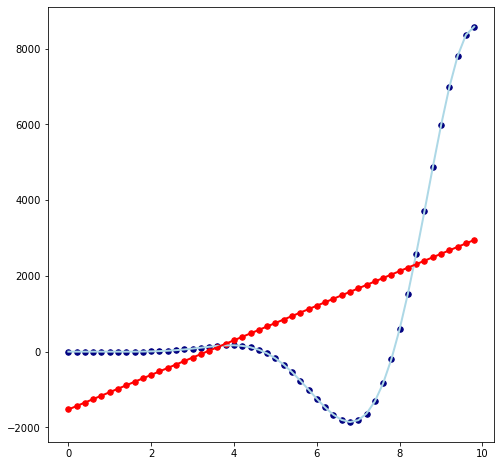

score (deg=2): 66.12%
coef (deg=2): [[    0.         -1699.50036417   220.02466838]]
intercept (deg=2): [1922.8887599]
feature names(deg=2): ['1' 'x0' 'x0^2']


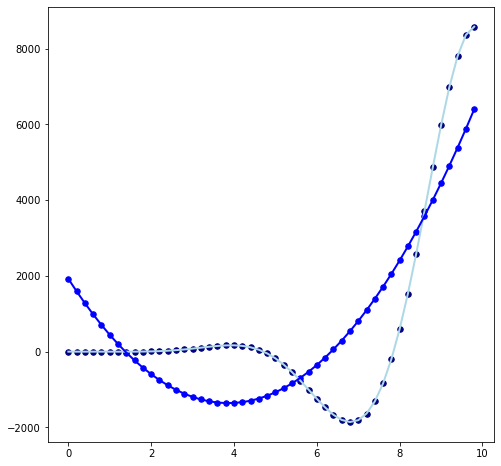

score (deg=3): 92.44%
coef (deg=3): [[   0.         2316.53632244 -814.89117365   70.40243823]]
intercept (deg=3): [-1190.13809295]
feature names(deg=3): ['1' 'x0' 'x0^2' 'x0^3']


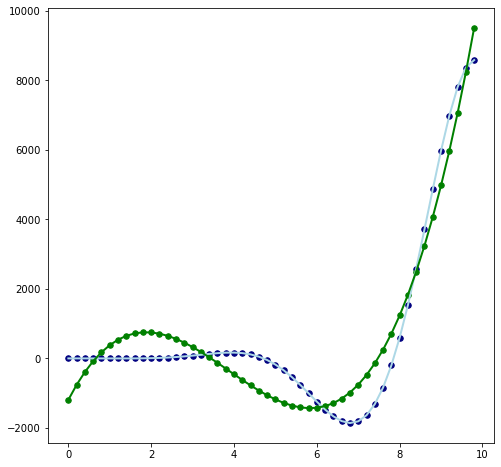

In [80]:
for i in range(1, 4):
    plot_poly_reg(x, y, i)